# UNSUPERVISED LEARNING

Compared to supervised learning where training data is labeled with the appropriate classifications, models using unsupervised learning must learn relationships between elements in a data set and classify the raw data without "help." This hunt for relationships can take many different algorithmic forms, but all models have the same goal of mimicking human logic by searching for indirect hidden structures, patterns or features to analyze new data.

<b>In short:</b>
* Unsupervised learning ﬁnds patterns in data e.g. clustering customers by their purchases
* Compressing the data using purchase patterns (dimension reduction)

## k-means clustering

### Dataset Overview : Graduate Admission

You generally deploy k-means algorithms to subdivide data points of a dataset into clusters based on nearest mean values. To determine the optimal division of your data points into clusters, such that the distance between points in each cluster is minimized, you can use k-means clustering. In the term k-means, k denotes the number of clusters in the data.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

Read data from csv

In [73]:
data = pd.read_csv(r'Graduate_Admission.csv', index_col = 'serial_no')

Checking the first n observations

In [27]:
data.head(5)

,gre_score,toefl_score,univ_rating,sop,lor,cgpa,research,admitted
serial_no,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,1
3,316,104,3,3.0,3.5,8.00,1,0
4,322,110,3,3.5,2.5,8.67,1,1
5,314,103,2,2.0,3.0,8.21,0,0


<b>Summary Statistics:</b>
* 25% is the Q1
* 50% is the Q2 or median
* 75% is the Q3

It is important to check the value between median and mean, high difference between these two values may indicate the presence of outlier in the data. Note: Even though `research` and `admitted` are represented by numeric value but those two variables are actually categorical or flag variable.

In [28]:
data.describe()

,gre_score,toefl_score,univ_rating,sop,lor,cgpa,research,admitted
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


Histogram gives good visualization to check the distribution of your data

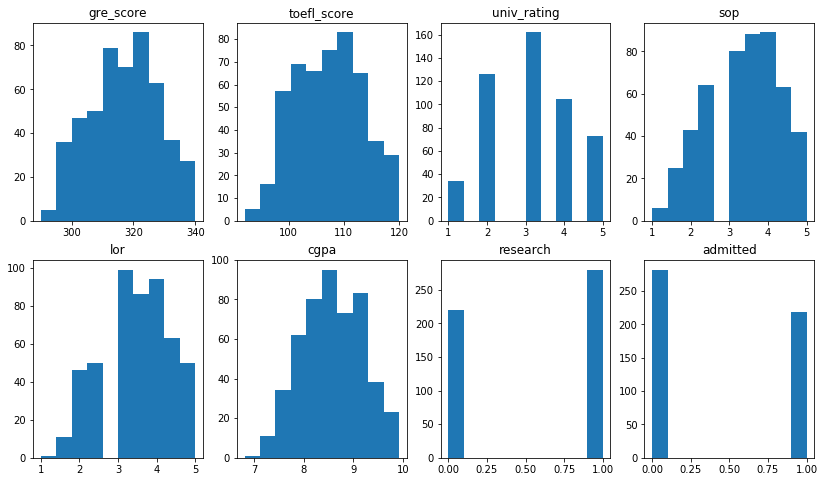

In [29]:
cols = data.columns

plt.figure(figsize=(14,8))
for i,col in enumerate(cols, start = 1):
    plt.subplot(2,4,i)
    plt.hist(data[col])
    plt.title(col)
plt.show()

### Model Fitting

Assume that we use `admitted` as reference to set number of clusters to 2. Usually, in unsupervised learning we don't have any reference variable then we need to find the best number of clusters based on the behavior of the data.

In [74]:
# Defining the model
model = KMeans(n_clusters=4)

# Fitting the model
model.fit(data.loc[:,:'research'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<b>Parameters:</b>

`n_clusters` : int, optional, default: 8
The number of clusters to form as well as the number of centroids to generate.

`init` : {‘k-means++’, ‘random’ or an ndarray}
Method for initialization, defaults to ‘k-means++’:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

‘random’: choose k observations (rows) at random from data for the initial centroids.

If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

`n_init` : int, default: 10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

`max_iter` : int, default: 300
Maximum number of iterations of the k-means algorithm for a single run.

`tol` : float, default: 1e-4
Relative tolerance with regards to inertia to declare convergence

`precompute_distances` : {‘auto’, True, False}
Precompute distances (faster but takes more memory).

‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

True : always precompute distances

False : never precompute distances

`verbose` : int, default 0
Verbosity mode.

`random_state` : int, RandomState instance or None (default)
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

`copy_x` : boolean, optional
When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified, ensuring X is C-contiguous. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean, in this case it will also not ensure that data is C-contiguous which may cause a significant slowdown.

`n_jobs` : int or None, optional (default=None)
The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.

None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

`algorithm` : “auto”, “full” or “elkan”, default=”auto”
K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. “auto” chooses “elkan” for dense data and “full” for sparse data.

### Prediction

In [75]:
data['prediction'] = model.predict(data.loc[:,:'research'])
data.head(10)

,gre_score,toefl_score,univ_rating,sop,lor,cgpa,research,admitted,prediction
serial_no,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1,3
2,324,107,4,4.0,4.5,8.87,1,1,0
3,316,104,3,3.0,3.5,8.00,1,0,2
4,322,110,3,3.5,2.5,8.67,1,1,0
5,314,103,2,2.0,3.0,8.21,0,0,2
6,330,115,5,4.5,3.0,9.34,1,1,3
7,321,109,3,3.0,4.0,8.20,1,1,0
8,308,101,2,3.0,4.0,7.90,0,0,2
9,302,102,1,2.0,1.5,8.00,0,0,1


Assume we have a new dataset to be predicted

In [32]:
new_data = pd.read_csv(r'Graduate_Admission.csv', index_col = 'serial_no' )
new_data = new_data.sample(frac=0.2)
new_data.shape

(100, 8)

In [33]:
new_data.head()

,gre_score,toefl_score,univ_rating,sop,lor,cgpa,research,admitted
serial_no,,,,,,,,
6,330,115,5,4.5,3.0,9.34,1,1
465,298,97,2,2.0,3.0,7.21,0,0
470,326,114,4,4.0,3.5,9.16,1,1
7,321,109,3,3.0,4.0,8.20,1,1
295,316,101,2,2.5,2.0,8.32,1,0


Using the model trained using `data` to predict `new_data`

In [34]:
model.predict(new_data.loc[:,:'research'])

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

### Visualizing The Data

If we the plot  `gre_score` vs `toefl_score` data with the prediction we can clearly see the clustering

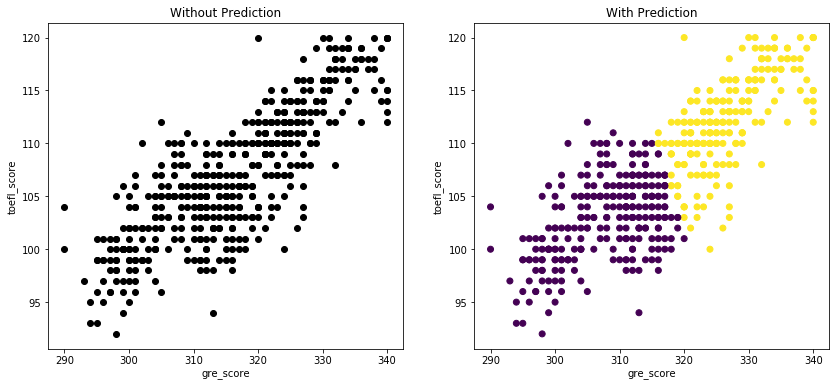

In [35]:
xs = data.loc[:,'gre_score'] 
ys = data.loc[:,'toefl_score'] 

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(xs, ys, c = 'black')
plt.xlabel('gre_score')
plt.ylabel('toefl_score')
plt.title('Without Prediction')

plt.subplot(1,2,2)
plt.scatter(xs, ys, c=data['prediction'])and
plt.xlabel('gre_score')
plt.ylabel('toefl_score')
plt.title('With Prediction')

plt.show()

### Adjusting the k

In [36]:
# Defining the model with n_clusters = 3
model2 = KMeans(n_clusters=3)

# Fitting the model
model2.fit(data.loc[:,:'research'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

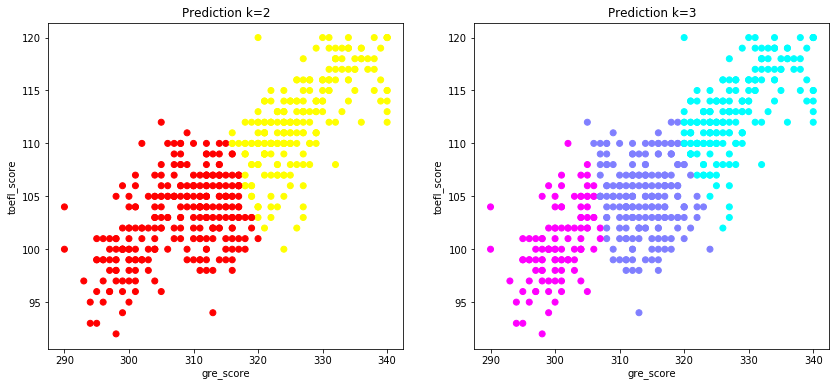

In [37]:
data['prediction2'] = model2.predict(data.loc[:,:'research'])
xs = data.loc[:,'gre_score'] 
ys = data.loc[:,'toefl_score'] 

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(xs, ys, c =data['prediction'], cmap='autumn')
plt.xlabel('gre_score')
plt.ylabel('toefl_score')
plt.title('Prediction k=2')

plt.subplot(1,2,2)
plt.scatter(xs, ys, c=data['prediction2'], cmap='cool')
plt.xlabel('gre_score')
plt.ylabel('toefl_score')
plt.title('Prediction k=3')

plt.show()

### Evaluating a Clustering

The question is which k is optimal? we can check the inertia or Sum of squared distances of samples to their closest cluster center. The small inertia value shows better clustering.

<b>Inertia measures clustering quality:</b>
* Measures how spread out the clusters are (lower is better) 
* Distance from each sample to centroid of its cluster 
* After fit(), available as attribute inertia_ 
* k-means attempts to minimize the inertia when choosing clusters

In [38]:
print('inertia model 1:',model.inertia_)
print('inertia model 2:',model2.inertia_)

inertia model 1: 29839.987518025835
inertia model 2: 17867.808069696093


<b>The number of clusters (Experimenting different k):</b>
* Clusterings of the dataset with diﬀerent numbers of clusters 
* More clusters means lower inertia 
* What is the best number of clusters?

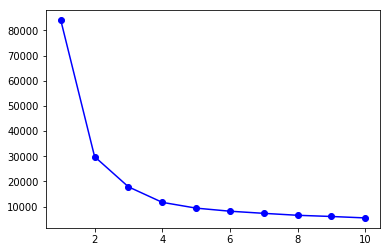

In [39]:
k = [1,2,3,4,5,6,7,8,9,10]
inertia = []

for K in k:
    kmean = KMeans(n_clusters=K)
    kmean.fit(data.loc[:,:'research'])
    inertia.append(kmean.inertia_)

plt.plot(k, inertia, color='blue', marker='o')
plt.show()

<b> Which k is the best? </b>
* A good clustering has tight clusters (so low inertia) 
* ... but not too many clusters! 
* Choose an `"elbow"` in the inertia plot, where inertia begins to decrease more slowly 

### Another Example: Iris Flower

In [40]:
iris = pd.read_csv(r'iris.csv')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Checking Iris flower species

In [41]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Assume we don't know the species of iris, we simply decide the k from the plot between `sepal_length` and `petal_width`

Text(0.5, 1.0, 'Iris_Flower')

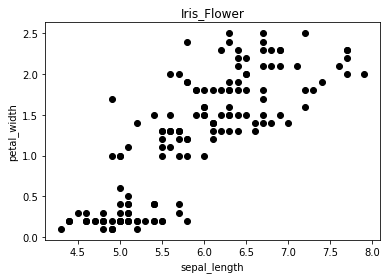

In [42]:
plt.scatter(iris['sepal_length'], iris['petal_width'], c=['black'])
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.title('Iris_Flower')

Text(0.5, 1.0, 'Clustering k=2')

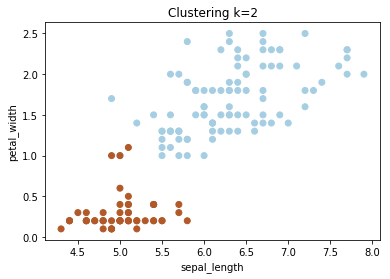

In [43]:
irisK = KMeans(n_clusters=2)
irisK.fit(iris.loc[:,:'petal_width'])
predict = irisK.predict(iris.loc[:,:'petal_width'])

plt.scatter(iris['sepal_length'], iris['petal_width'], c=predict, cmap='Paired')
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.title('Clustering k=2')

Finding the best clustering

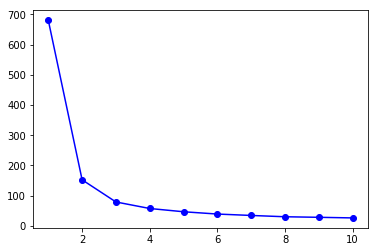

In [44]:
k = [1,2,3,4,5,6,7,8,9,10]
inertia = []

for K in k:
    kmean = KMeans(n_clusters=K)
    kmean.fit(iris.loc[:,:'petal_width'])
    inertia.append(kmean.inertia_)

plt.plot(k, inertia, color='blue', marker='o')
plt.show()

It looks like k = 3 will be a good choice

Text(0.5, 1.0, 'Clustering k=3')

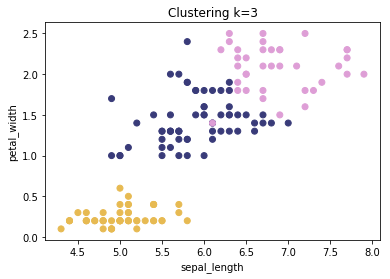

In [45]:
irisK = KMeans(n_clusters=3)
irisK.fit(iris.loc[:,:'petal_width'])
predict = irisK.predict(iris.loc[:,:'petal_width'])

plt.scatter(iris['sepal_length'], iris['petal_width'], c=predict, cmap='tab20b')
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.title('Clustering k=3')

## Hierarchical Clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other. Strategies for hierarchical clustering generally fall into two types:
* Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
* Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

### Dataset Overview: Eurovision2016

The Data contains scores from some countries to songs performed at the Eurovision 2016

In [46]:
euro = pd.read_csv(r'eurovision-2016.csv')
euro.dtypes

From country        object
To country          object
Jury A               int64
Jury B               int64
Jury C               int64
Jury D               int64
Jury E               int64
Jury Rank            int64
Televote Rank        int64
Jury Points        float64
Televote Points    float64
dtype: object

In [47]:
euro.head(5)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [48]:
euro.shape

(1066, 11)

### Agglomerative Hierarchical Clustering

* Every country begins in a separate cluster 
* At each step, the two closest clusters are merged 
* Continue until all countries in a single cluster 
* Height on dendrogram = distance between merging clusters

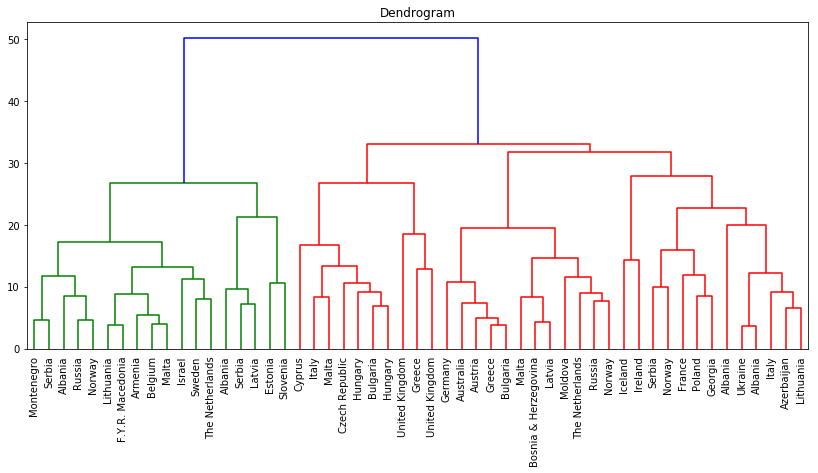

In [87]:
from scipy.cluster.hierarchy import linkage, dendrogram 
import numpy as np

hclust = euro.sample(frac=0.05)
score = hclust.loc[:,'Jury A':'Jury E'].values
country_names = hclust['From country'].values

mergings = linkage(score, method='complete') 

plt.figure(figsize=(14,6))
dendrogram(mergings,labels=country_names,
            leaf_rotation=90,
            leaf_font_size=10) 

plt.title('Dendrogram')
plt.show()

<b>Distance between clusters: </b>
* Defined by a "linkage method" 
* Unsupervised Learning in Python
* Specified via method parameter, e.g. linkage(samples, method="complete") 
* In "complete" linkage: distance between clusters is max. distance between
their samples 
* Different linkage method, different hierarchical clustering!

### Choosing Linkage Method

* Method of single linkage or nearest neighbour. Proximity between two clusters is the proximity between their two closest objects. 
* Method of complete linkage or farthest neighbour. Proximity between two clusters is the proximity between their two most distant objects. 
* Simple average, or method of equilibrious between-group average linkage (WPGMA) is the modified previous. 
* Centroid method (UPGMC). Proximity between two clusters is the proximity between their geometric centroids: [squared] euclidean distance between those.
* Median, or equilibrious centroid method (WPGMC) is the modified previous.
* Ward’s method, or minimal increase of sum-of-squares (MISSQ), sometimes incorrectly called "minimum variance" method.

<b>Good Linkage Method</b> is usually based on interpretability. How meaningful are the results for you, the domain and, possibly audience/client

In [82]:
linkage?

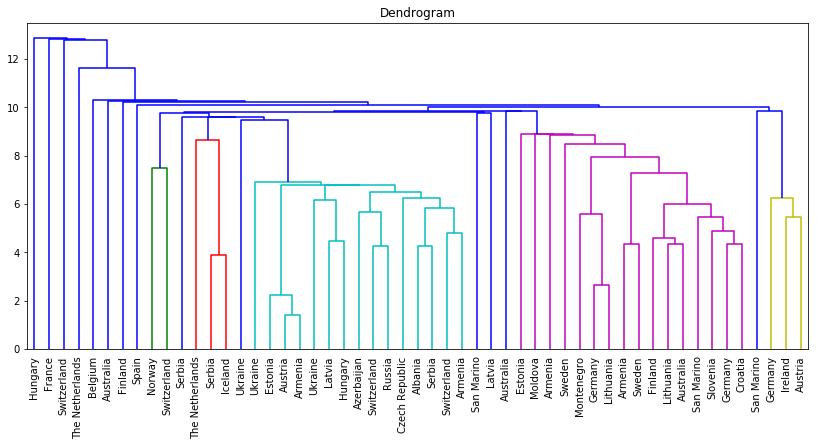

In [50]:
mergings = linkage(score, method='single') 

plt.figure(figsize=(14,6))
dendrogram(mergings,labels=country_names,
            leaf_rotation=90,
            leaf_font_size=10) 

plt.title('Dendrogram')
plt.show()

### Extracting Cluster Labels

For example, we want to extract label where height on Dendrogram is 10

In [88]:
from scipy.cluster.hierarchy import fcluster 

labels = fcluster(mergings, 30, criterion='distance') 

pairs = pd.DataFrame({'labels': labels, 'countries': country_names}) 
print(pairs.sort_values('labels'))

    labels             countries
26       1      F.Y.R. Macedonia
49       1                Latvia
42       1       The Netherlands
39       1               Albania
34       1                Norway
33       1                Serbia
25       1              Slovenia
24       1               Albania
22       1             Lithuania
21       1                 Malta
20       1               Estonia
18       1               Armenia
13       1               Belgium
52       1                Serbia
4        1                Sweden
7        1            Montenegro
1        1                Russia
9        1                Israel
43       2                Cyprus
29       2                 Italy
51       2               Hungary
8        2                Greece
19       2        United Kingdom
50       2               Hungary
3        2              Bulgaria
40       2        Czech Republic
15       2        United Kingdom
47       2                 Malta
46       3                Norway
36       3

## Association Rules

There are many data analysis tools available to the python analyst and it can be challenging to know which ones to use in a particular situation. A useful (but somewhat overlooked) technique is called association analysis which attempts to find common patterns of items in large data sets. One specific application is often called market basket analysis. 

In [89]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Dataset Overview: Online Retail

In [90]:
df = pd.read_excel(r'Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [54]:
df.shape

(541909, 8)

### Data Preparation

There is a little cleanup, we need to do. First, some of the descriptions have spaces that need to be removed. We’ll also drop the rows that don’t have invoice numbers and remove the credit transactions (those with invoice numbers containing C).

In [55]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

After the cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded. For the sake of keeping the data set small, we are only looking at sales for France.

In [56]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [57]:
basket.tail()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0.

In [58]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [59]:
basket_sets = basket.applymap(encode_units)

### The Rules: Support, Confidence, and Lift 

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that I could get enough useful examples)

In [60]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

The final step is to generate the rules with their corresponding support, confidence and lift

In [61]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[['antecedents','consequents','support','confidence','lift']].head()

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.073980,0.725000,7.478947
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.073980,0.763158,7.478947
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.079082,0.815789,8.642959
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.079082,0.837838,8.642959
4,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.084184,0.868421,1.134737


### Filtering The Rules

Assume we want to set the rule based on our domain knowledge, we would say that confidence above 90% and lift above 6 would give us more profit

In [62]:
rules[['antecedents','consequents','support','confidence','lift']][ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.9) ]

,antecedents,consequents,support,confidence,lift
77,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.122449,0.960000,6.968889
116,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.952381,6.913580
121,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.099490,0.975000,7.644000
122,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.099490,0.975000,7.077778
128,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.081633,0.969697,7.602424
129,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.081633,0.969697,7.039282


We can see that around 96% of the cases SET/6 RED SPOTTY PAPER PLATES and SET/6 RED SPOTTY PAPER CUPS are purchased together

At this point, you may want to look at how much opportunity there is to use the popularity of one product to drive sales of another.

In [63]:
basket['SET/6 RED SPOTTY PAPER PLATES'].sum()

1116.0

In [64]:
basket['SET/6 RED SPOTTY PAPER CUPS'].sum()

1272.0